<a href="https://colab.research.google.com/github/mangalm96/HP-TopicModeling/blob/main/HP_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import and Installation

In [160]:
import matplotlib.pyplot as plt

In [3]:
# import libraries
import pickle
import os
import re
import seaborn as sns
!pip install path
!pip install -q pandas
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib

     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 6.4 MB 28.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.9 MB 22.7 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 3.4 MB 24.0 MB/s 
     |████████████████████████████████| 3.3 MB 23.4 MB/s 
     |████████████████████████████████| 1.2 MB 40.0 MB/s 
     |████████████████████████████████| 61 kB 472 kB/s 
     |████████████████████████████████| 895 kB 69.9 MB/s 
     |████████████████████████████████| 596 kB 39.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# top2vec installations
!pip install -q top2vec[sentence_transformers]
!pip install -q numpy==1.20.0

In [8]:
# import packages for top2vec
# if doesn't run in first go, run again
import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec
import time

#### Final Model Specs

In [49]:
# pick all books together 


all_books = []
for bk_name in hp_book.keys():
  entire_text =[]
  entire_text=' '.join(hp_book[bk_name])
  all_books.append(entire_text)

complete_text = " ".join(all_books)

# divide into chapters
rgr = r'CHAPTER|Chapter\s[A-Z]{3,}'
chapter_wise_all = re.split(rgr,complete_text)
title = chapter_wise_all.pop(0)

# split on last two books
rgr_new = r'Chapter\s\d+'
remain_text = re.split(rgr_new,chapter_wise_all[-1])

# split on last book
rgr_new_2 = r'Chapter\s[A-za-z]{3,}'
remain_text_full = re.split(rgr_new_2,remain_text[-1])

# split on 2nd book
# rgr_new_hp2 = r'\d{1,2}'
# remain_text_fullfull = re.split(rgr_new_hp2,remain_text_full[-1])

# merge all three lists together 
# full_text_4_3 = chapter_wise_all[:-1] + remain_text[:-1] + remain_text_full[:-1] + remain_text_fullfull
full_text_4_3 = chapter_wise_all[:-1] + remain_text[:-1] + remain_text_full





In [ ]:
# no of chars in eac chapter
for ch in full_text_4_3:
  print(len(ch))

In [82]:
#### final model

## each chapter will acts as a document for my Top2Vec algorithm 
# run top2vec model 
start_time = time.time()
# model_full = Top2Vec(documents=full_text,speed='learn',workers=8)  # training using Doc2Vec
# model_full_2 = Top2Vec(documents=full_text,speed='learn')  # training using Doc2Vec
model_full_3 = Top2Vec(documents=full_text_4_3,speed='deep-learn',workers=12) # training using Doc2Vec
print('Total time taken (mins): ', int((time.time()-start_time)/60))


2021-12-15 22:54:09,397 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2021-12-15 22:54:14,525 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-12-15 23:16:56,423 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-12-15 23:16:59,917 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-12-15 23:16:59,936 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Total time taken (mins):  22


#### Load saved model 

In [130]:
# the above model was trained using the above code but was saved so that I could load and work with it and not train it everytime
pickled_model = pickle.load(open('/content/drive/My Drive/model_full_3.pickle', 'rb'))

In [138]:
pickled_model.get_num_topics()
topic_words, word_scores, topic_nums = pickled_model.get_topics(pickled_model.get_num_topics())
topic_words
## topic 2 def related to death, pain ,fear, volderort, death eater, kill
## topic 1 could be hogwarts related -- classes, dorm, houses, detention, prof, quidditch
## topic 3 could be related to family and friends with whom interaction is outside hogwarts -- dursleys, weasleys, godfather, tonks, burrow, sirius


array([['lesson', 'common', 'umbridge', 'class', 'professor', 'ron',
        'hermione', 'just', 'lavender', 'homework', 'lessons',
        'classroom', 'about', 'during', 'dormitory', 'really', 'looking',
        'some', 'gryffindor', 'malfoy', 'teacher', 'practice', 'goyle',
        'slytherins', 'potions', 'detention', 'students', 'gryffindors',
        'quidditch', 'parvati', 'to', 'team', 'doing', 'yeah', 'look',
        'up', 'mcgonagall', 'when', 'though', 'crabbe', 'cho', 'library',
        'towards', 'alicia', 'said', 'angelina', 'pitch', 'lunch',
        'corridors', 'match'],
       ['voldemort', 'death', 'lord', 'bellatrix', 'pain', 'eaters',
        'body', 'darkness', 'fear', 'horcrux', 'felt', 'wand', 'upon',
        'knew', 'griphook', 'beneath', 'wormtail', 'ariana', 'light',
        'could', 'kill', 'elder', 'dead', 'him', 'hallows', 'eater',
        'he', 'beyond', 'eyes', 'man', 'but', 'raised', 'the', 'scar',
        'not', 'narcissa', 'killed', 'then', 'as', 'grou

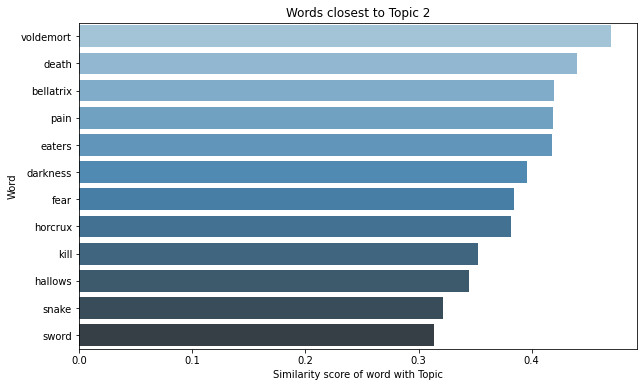

In [195]:
topic2_scores = {}
for w,s in zip(topic_words[1],word_scores[1]):
  topic2_scores[w] = s

a=dict(sorted(topic2_scores.items(), key=lambda x: x[1],reverse=True))

keys = list(a.keys()) # sorted by key, return a list of tuples
# allowed_list = ['voldemort','death','lord','bellatrix','pain','eaters','body','darkness','fear'
# ,'hocrux','kill','dead','hallows','snake','sword']
allowed_list = ['voldemort','death','bellatrix','pain','eaters','darkness','fear','horcrux','kill','hallows','snake','sword']
vals=[]
for k in keys:
  if k in allowed_list:
    # print(a[k])
    vals.append(float(a[k]))

plt.figure(figsize = (10,6))
ax=sns.barplot(y=allowed_list, x=vals,palette="Blues_d")
ax.set(xlabel='Similarity score of word with Topic', ylabel='Word')
ax.set_title("Words closest to Topic 2")
plt.show()



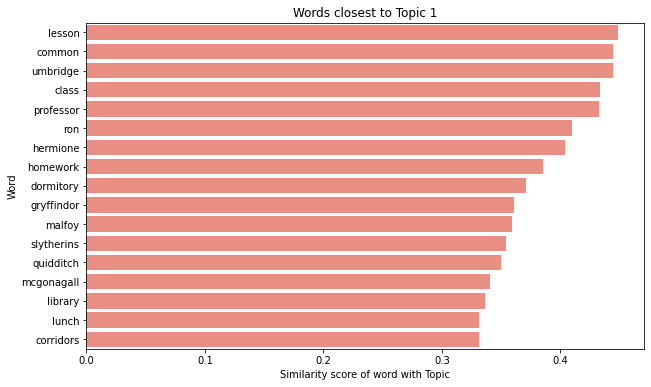

In [199]:
topic1_scores = {}
for w,s in zip(topic_words[0],word_scores[0]):
  topic1_scores[w] = s

a=dict(sorted(topic1_scores.items(), key=lambda x: x[1],reverse=True))
keys = list(a.keys()) # sorted by key, return a list of tuples
# allowed_list = ['voldemort','death','lord','bellatrix','pain','eaters','body','darkness','fear'
# ,'hocrux','kill','dead','hallows','snake','sword']
allowed_list = ['lesson','common','umbridge','class','professor','ron','hermione','homework','dormitory','gryffindor','malfoy','slytherins','quidditch','mcgonagall','library','lunch','corridors']

vals=[]
for k in keys:
  if k in allowed_list:
    # print(a[k])
    vals.append(float(a[k]))

plt.figure(figsize = (10,6))
ax=sns.barplot(y=allowed_list, x=vals,color="salmon")
ax.set(xlabel='Similarity score of word with Topic', ylabel='Word')
ax.set_title("Words closest to Topic 1")
plt.show()



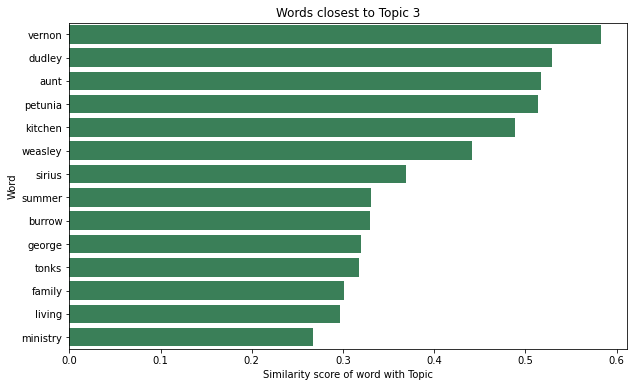

In [204]:
topic3_scores = {}
for w,s in zip(topic_words[2],word_scores[2]):
  topic3_scores[w] = s

a=dict(sorted(topic3_scores.items(), key=lambda x: x[1],reverse=True))
keys = list(a.keys()) # sorted by key, return a list of tuples
# allowed_list = ['voldemort','death','lord','bellatrix','pain','eaters','body','darkness','fear'
# ,'hocrux','kill','dead','hallows','snake','sword']
allowed_list = ['vernon','dudley','aunt','petunia','kitchen','weasley','sirius','summer','burrow','george','tonks','family','living','ministry']
# allowed_list = []
vals=[]
for k in keys:
  if k in allowed_list:
    # print(a[k])
    vals.append(float(a[k]))

plt.figure(figsize = (10,6))
ax=sns.barplot(y=allowed_list, x=vals,color="seagreen")
ax.set(xlabel='Similarity score of word with Topic', ylabel='Word')
ax.set_title("Words closest to Topic 3")
plt.show()



In [207]:
documents, document_scores, document_ids = pickled_model.search_documents_by_keywords(keywords=["love"], num_docs=15)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 128, Score: 0.22720858454704285
-----------
: The Unbreakable Vow Snow was swirling against the icy windows once more; Christmas was approaching fast. Hagrid had already singlehandedly delivered the usual twelve C hristmas trees to the Great Hall; garlands of holly and tinsel had been twisted around the banisters of the stairs; everlasting candles glowed from inside the helmets of suits of armor and great bunches of mistletoe had been hung at intervals along the corridors. Large groups of girls tended to converge underneath the mistletoe bunches every time Harry went past, which caused blockages in the corridors; fortunat e ly, however, Harry's frequent nighttime wanderings had given him an unusually good knowledge of the castle's secret passageways, so that he was often, without too much difficulty, to naviga t e mistletoe-free routes between classes. Ron, who might once have found the necessity of these detours excuse for jealousy rather than hilarity, simply roared with la

In [208]:
documents, document_scores, document_ids = pickled_model.search_documents_by_keywords(keywords=["death"], num_docs=15)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 110, Score: 0.39346981048583984
-----------
 THIRTY-FIVE Beyond the Veil Black shapes were emerging out of thin air all around them, blocking their way left and right; eyes glinted through slits in hoods, a dozen lit wand tips were pointing directly at their hearts; Ginny gave a gasp of horror. "To me, Potter," repeated the drawling voice of Lucius Malfoy as he held out his hand, palm up. Harrys insides plummeted sickeningly. They were trapped, and outnumbered two to one. "To me," said Malfoy yet again. "Where’s Sirius?" Harry said. Several of the Death Eaters laughed; a harsh female voice from the midst of the shadowy figures to Harry’s left said triumphantly, "The Dark Lord always knows!" "Always," echoed Malfoy softly. "Now, give me the prophecy Potter." "I want to know where Sirius is!" "I want to know where Sirius is!" mimicked the woman to his left. She and her fellow Death Eaters had closed in so that they were mere feet away from Harry and the others, the light from t

In [211]:
# racial and discrimination related terms not found
documents, document_scores, document_ids = pickled_model.search_documents_by_keywords(keywords=["racial"], num_docs=15)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

ValueError: ignored